In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

#Path
#Insert your local repo path to file 
repo_path = "INSERT YOUR LOCAL SDC-SECURITY REPO PATH HERE"
repo_path ='D:\Archivos\Social Data Challenge\sdc-security'

In [2]:
cuau_path = "\datasets\cuau_homologated.csv.zip"

zf = zipfile.ZipFile(repo_path+cuau_path) 
cuau = pd.read_csv(zf.open('cuau_homologated.csv'))
cuau.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,tipopersona,calidadjuridica,anio_denuncia,...,colonia_alt,crimen_lat,crimen_lon,hecho_time,denuncia_time,cve_col,clasif,alc,cve_alc,polygon
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,DOCTORES I,19.42244,-99.15237,2018-12-25 04:00:00,2019-01-04 13:16:00,015-010,COLONIA,CUAUHTEMOC,15,"[[-99.15519890116673, 19.40656058216308], [-99..."
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,39,FISICA,OFENDIDO,2019,...,MORELOS II,19.44962,-99.12782,2018-12-23 10:00:00,2019-01-04 13:19:00,015-019,COLONIA,CUAUHTEMOC,15,"[[-99.13938480039275, 19.44401178894581], [-99..."
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,FISICA,OFENDIDO,2019,...,ROMA NORTE III,19.41359,-99.15729,2018-12-31 11:00:00,2019-01-04 13:23:00,015-024,COLONIA,CUAUHTEMOC,15,"[[-99.17671177030077, 19.420286327194944], [-9..."
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,FISICA,VICTIMA Y DENUNCIANTE,2019,...,JUAREZ,19.42676,-99.16640,2019-01-03 15:00:00,2019-01-04 13:35:00,015-017,COLONIA,CUAUHTEMOC,15,"[[-99.17571912544206, 19.422519931378844], [-9..."
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,GUERRERO III,19.43769,-99.14753,2018-12-22 18:34:00,2019-01-04 13:59:00,015-014,COLONIA,CUAUHTEMOC,15,"[[-99.14910747563131, 19.437890366845085], [-9..."


In [3]:
#Counting crimes in district Cuauhtemoc
colonias_crimes = {item: (cuau['colonia'] == str(item)).sum() for item in cuau.colonia.unique()}
ordered = dict(sorted(colonias_crimes.items(), key=lambda item: item[1], reverse=True))
ordered


{'CENTRO': 21901,
 'DOCTORES': 14089,
 'ROMA NORTE': 8502,
 'JUAREZ': 6063,
 'GUERRERO': 5647,
 'SANTA MARIA LA RIBERA': 4757,
 'BUENAVISTA': 4308,
 'OBRERA': 4187,
 'CUAUHTEMOC': 3447,
 'MORELOS': 3430,
 'HIPODROMO': 3413,
 'ROMA SUR': 3398,
 'NONOALCO TLATELOLCO': 2504,
 'SAN RAFAEL': 2460,
 'TABACALERA': 2177,
 'PERALVILLO': 1921,
 'TRANSITO': 1487,
 'CONDESA': 1457,
 'SAN SIMON TOLNAHUAC': 1258,
 'EX HIPODROMO DE PERALVILLO': 1233,
 'ATLAMPA': 1172,
 'VISTA ALEGRE': 918,
 'ALGARIN': 757,
 'HIPODROMO CONDESA': 725,
 'AMPL. ASTURIAS': 649,
 'VALLE GOMEZ': 512,
 'ASTURIAS': 396,
 'ESPERANZA': 392,
 'PAULINO NAVARRO': 382,
 'SANTA MARIA INSURGENTES': 372,
 'FELIPE PESCADOR': 170,
 'MAZA': 109,
 'BUENOS AIRES': 17}

In [4]:
import json

categorias = {item: (cuau['categoria'] == str(item)).sum() for item in cuau.categoria.unique()}
categorias = {key: value.tolist() if isinstance(value, np.int64) else value for key, value in categorias.items()}
categorias_ord = dict(sorted(categorias.items(), key=lambda item: item[1], reverse=True))

print(json.dumps(categorias_ord, indent = 2))


bajo_impacto = {item: (cuau['delito'] == str(item)).sum() for item in cuau.loc[cuau["categoria"] == "DELITO DE BAJO IMPACTO",'delito'].unique()}
bajo_impacto = {key: value.tolist() if isinstance(value, np.int64) else value for key, value in bajo_impacto.items()}
bajo_impacto_ord = dict(sorted(bajo_impacto.items(), key=lambda item: item[1], reverse=True))

print(json.dumps(bajo_impacto_ord, indent=2))


{
  "DELITO DE BAJO IMPACTO": 89314,
  "ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIOLENCIA": 6588,
  "ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA": 1995,
  "ROBO DE VEHICULO CON Y SIN VIOLENCIA": 1963,
  "HECHO NO DELICTIVO": 1625,
  "VIOLACION": 704,
  "HOMICIDIO DOLOSO": 561,
  "ROBO A NEGOCIO CON VIOLENCIA": 550,
  "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO": 244,
  "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA": 165,
  "ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA": 161,
  "ROBO A CASA HABITACION CON VIOLENCIA": 121,
  "ROBO A REPARTIDOR CON Y SIN VIOLENCIA": 120,
  "ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA": 74,
  "SECUESTRO": 13,
  "ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA": 12
}
{
  "FRAUDE": 13732,
  "VIOLENCIA FAMILIAR": 9453,
  "AMENAZAS": 7912,
  "ROBO DE ACCESORIOS DE AUTO": 6932,
  "ROBO DE OBJETOS": 6062,
  "ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO": 2407,
  "USURPACION DE IDENTIDAD": 2210,
  "ABUSO DE CONFIANZA": 1875,
  "ABU

<AxesSubplot: >

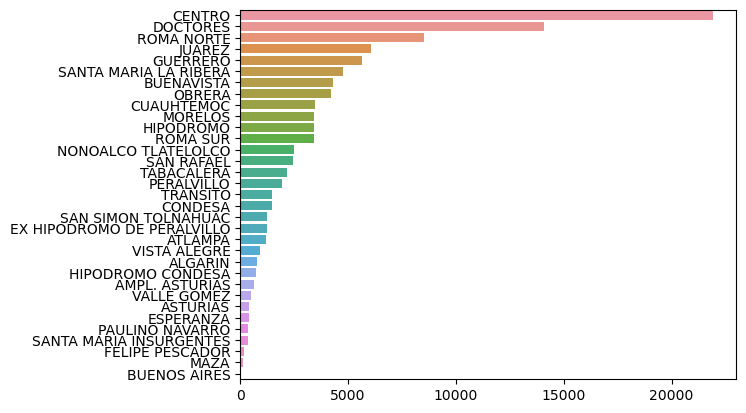

In [5]:
import seaborn as sns
#USING PANDAS
#cuau['colonia'].value_counts().head(20).sort_index().plot.barh()

#USING SEABORN
keys= list(ordered.keys())
vals = [ordered[k] for k in keys]
sns.barplot(x=vals,y=keys, orient ='h')


20 *colonias* with higher amount of crimes

<AxesSubplot: >

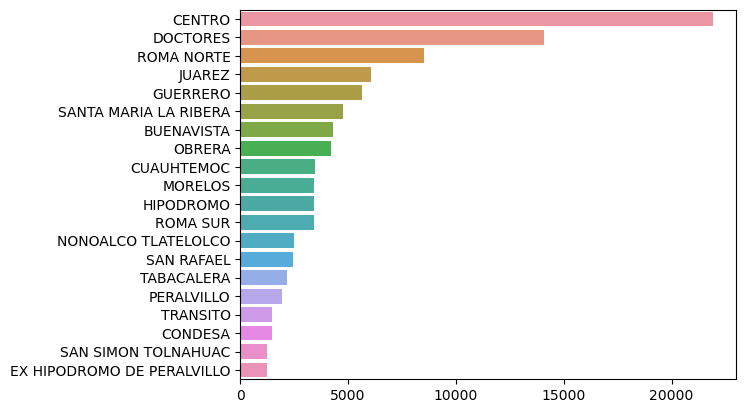

In [6]:
keys= list(ordered.keys())[:20]
vals = [ordered[k] for k in keys]
sns.barplot(x=vals ,y= keys, orient ='h')


In [7]:
cuau_delitos = cuau.groupby(['colonia','categoria','delito']).size().reset_index(name ='count').copy()
cuau_delitos= cuau_delitos.sort_values(by = ['count'], ascending = False)

cuau_delitos

,colonia,categoria,delito,count
980,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,3923
548,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2670
506,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1588
649,CENTRO,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1582
693,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1457
...,...,...,...,...
903,CUAUHTEMOC,HECHO NO DELICTIVO,DDH FRVT,1
901,CUAUHTEMOC,DELITO DE BAJO IMPACTO,USURPACION DE PROFESION,1
2947,SAN SIMON TOLNAHUAC,DELITO DE BAJO IMPACTO,EJERCICIO ILEGAL Y ABANDONO DEL SERVICIO PUBLICO,1
2948,SAN SIMON TOLNAHUAC,DELITO DE BAJO IMPACTO,ENCUBRIMIENTO,1


In [8]:
cuau_delitos.head(20)

,colonia,categoria,delito,count
980,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,3923
548,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2670
506,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1588
649,CENTRO,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1582
693,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1457
619,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,1425
2576,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1414
1074,DOCTORES,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1251
1740,JUAREZ,DELITO DE BAJO IMPACTO,FRAUDE,1176
2523,ROMA NORTE,DELITO DE BAJO IMPACTO,FRAUDE,1010


In [9]:
def heatmap(heatmap_data,title,xlabel, ylabel):
    # Create the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='YlGnBu', linewidths=0.5, \
                xticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.columns],
                yticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.index])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [10]:
heatmap_data = cuau_delitos.pivot_table(index='categoria', columns='colonia', values='count', fill_value=0,aggfunc='sum')


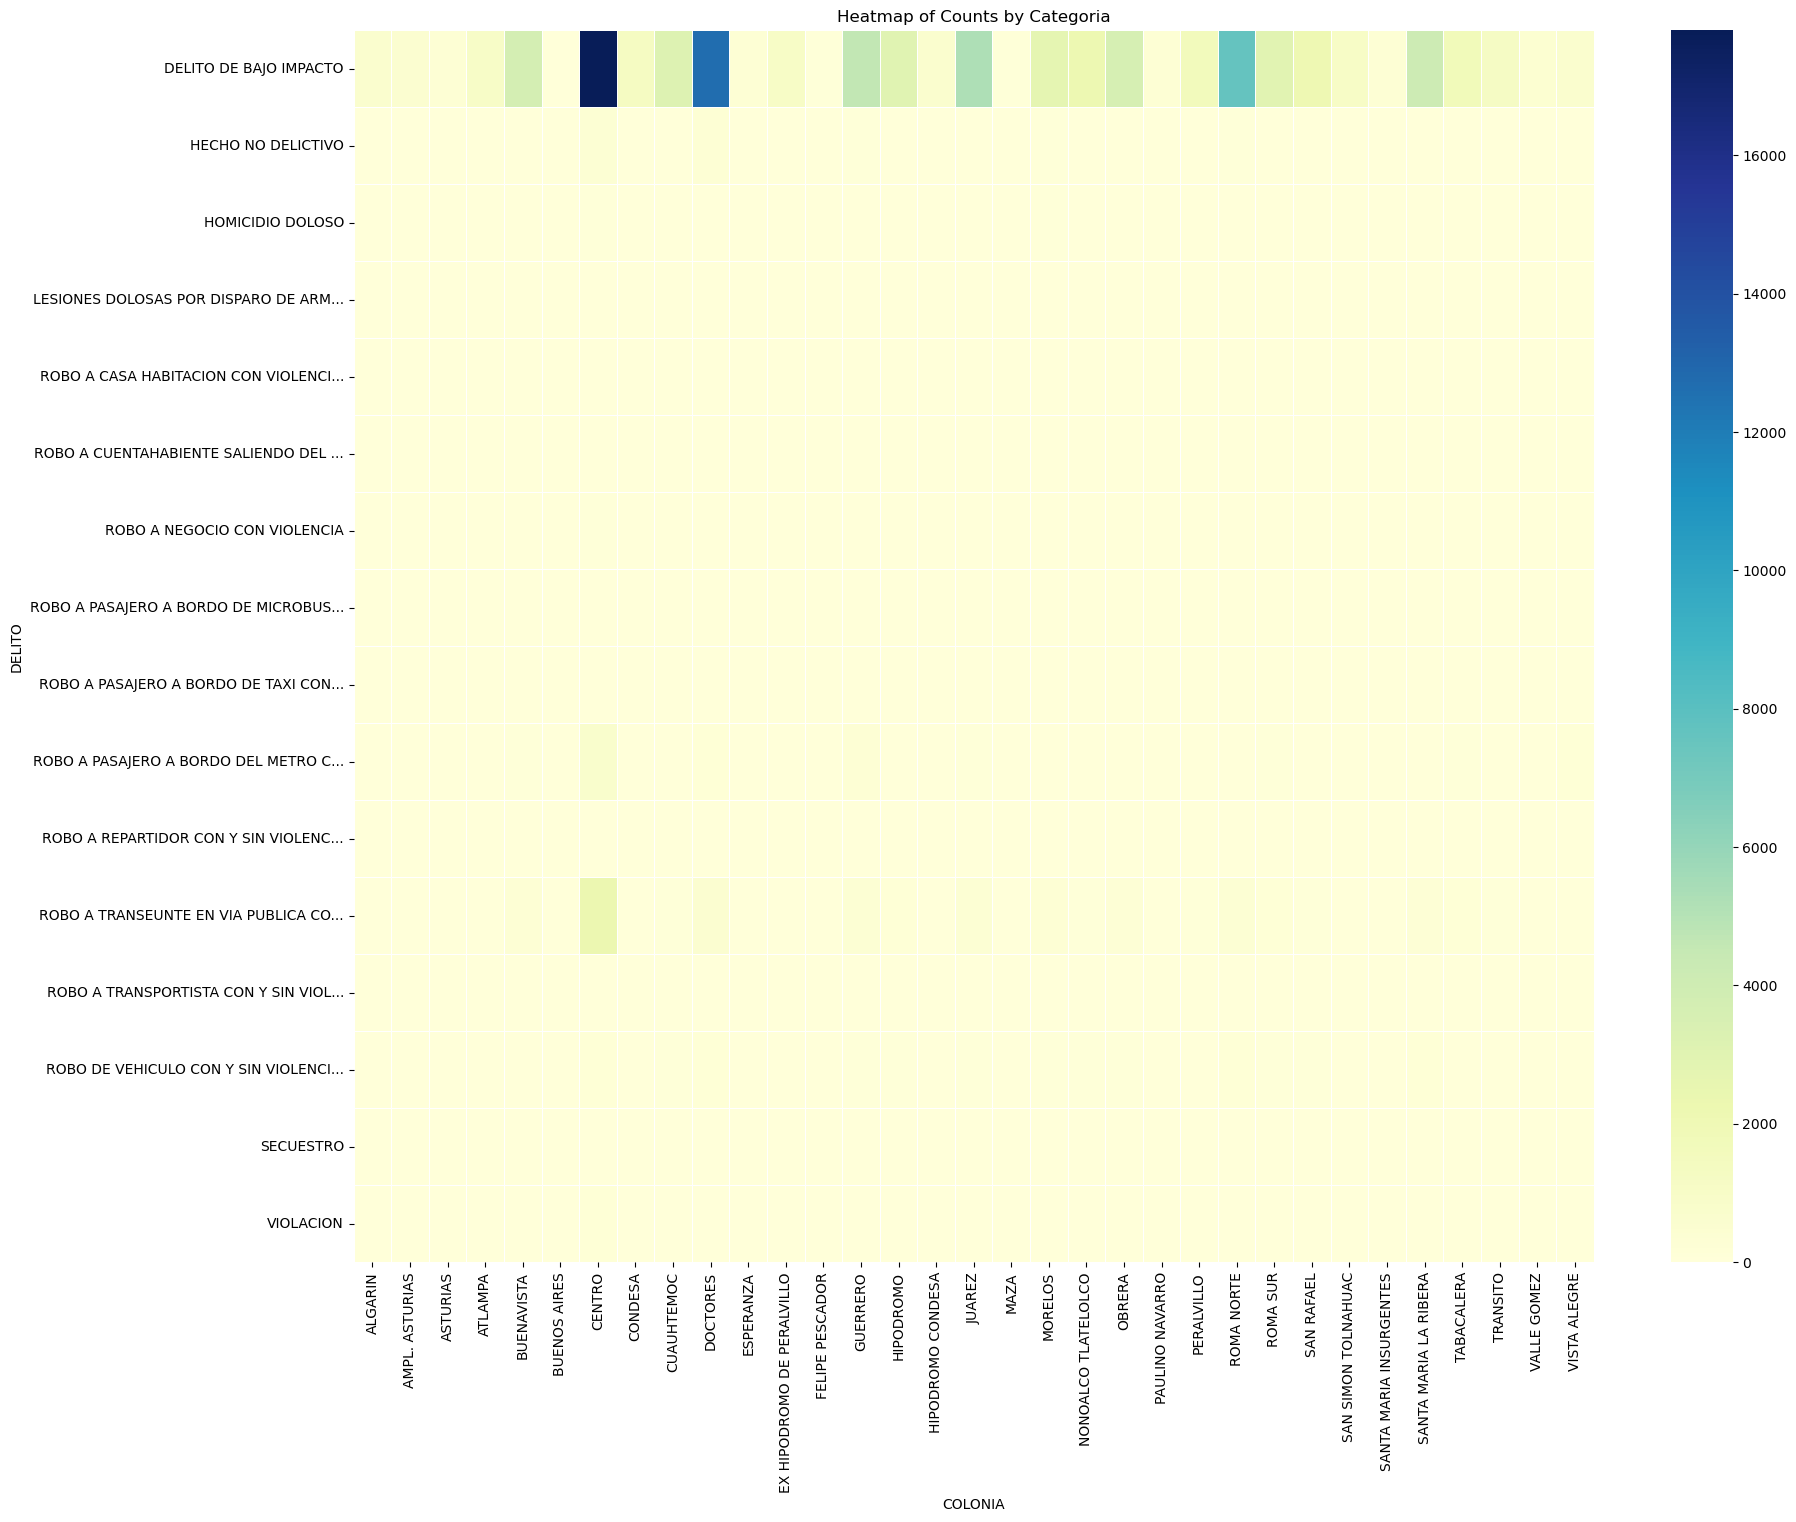

In [11]:
heatmap(heatmap_data, 'Heatmap of Counts by Categoria','COLONIA','DELITO')


There is plenty of crimes with *categoria* "DELITO DE BAJO IMPACTO". A heatmap without those crimes will be created, as well as another with only crimes related to this category, so that we can get a better understanding of what is happening on each *colonia* .

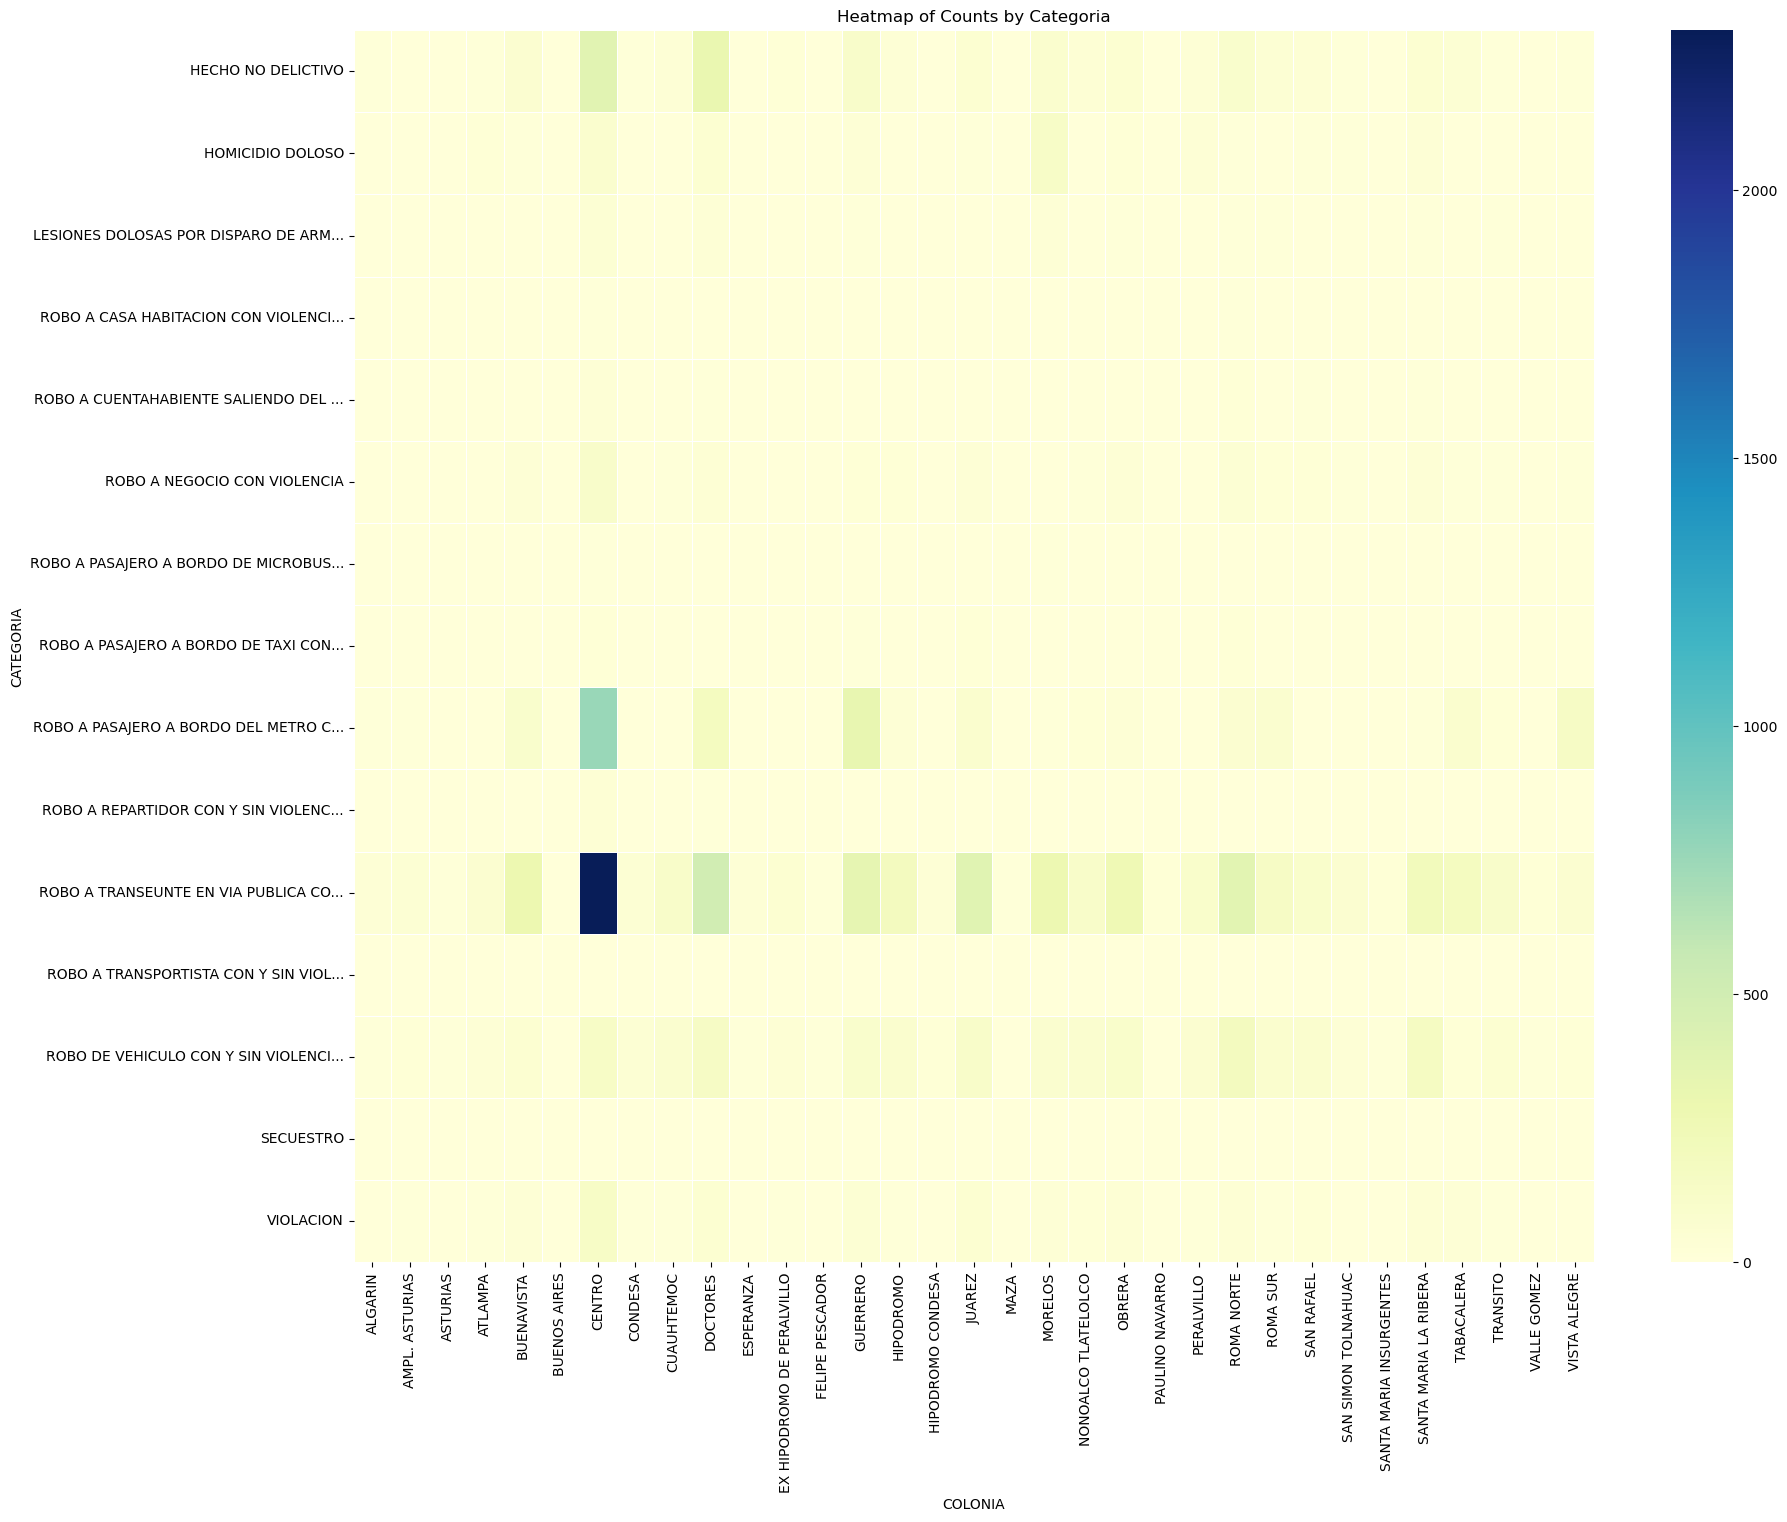

In [12]:

values_to_drop = ['DELITO DE BAJO IMPACTO']
rows_to_drop = heatmap_data.index.isin(values_to_drop)
heatmap(heatmap_data[~rows_to_drop], 'Heatmap of Counts by Categoria','COLONIA','CATEGORIA')


In [13]:
cuau_bajo = cuau_delitos[cuau_delitos.categoria.isin(['DELITO DE BAJO IMPACTO'])].sort_values(by = 'count', ascending = False).copy()
cuau_bajo.head(10)

,colonia,categoria,delito,count
980,DOCTORES,DELITO DE BAJO IMPACTO,FRAUDE,3923
548,CENTRO,DELITO DE BAJO IMPACTO,FRAUDE,2670
506,CENTRO,DELITO DE BAJO IMPACTO,AMENAZAS,1588
649,CENTRO,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1582
619,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,1425
2576,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1414
1074,DOCTORES,DELITO DE BAJO IMPACTO,VIOLENCIA FAMILIAR,1251
1740,JUAREZ,DELITO DE BAJO IMPACTO,FRAUDE,1176
2523,ROMA NORTE,DELITO DE BAJO IMPACTO,FRAUDE,1010
944,DOCTORES,DELITO DE BAJO IMPACTO,AMENAZAS,837


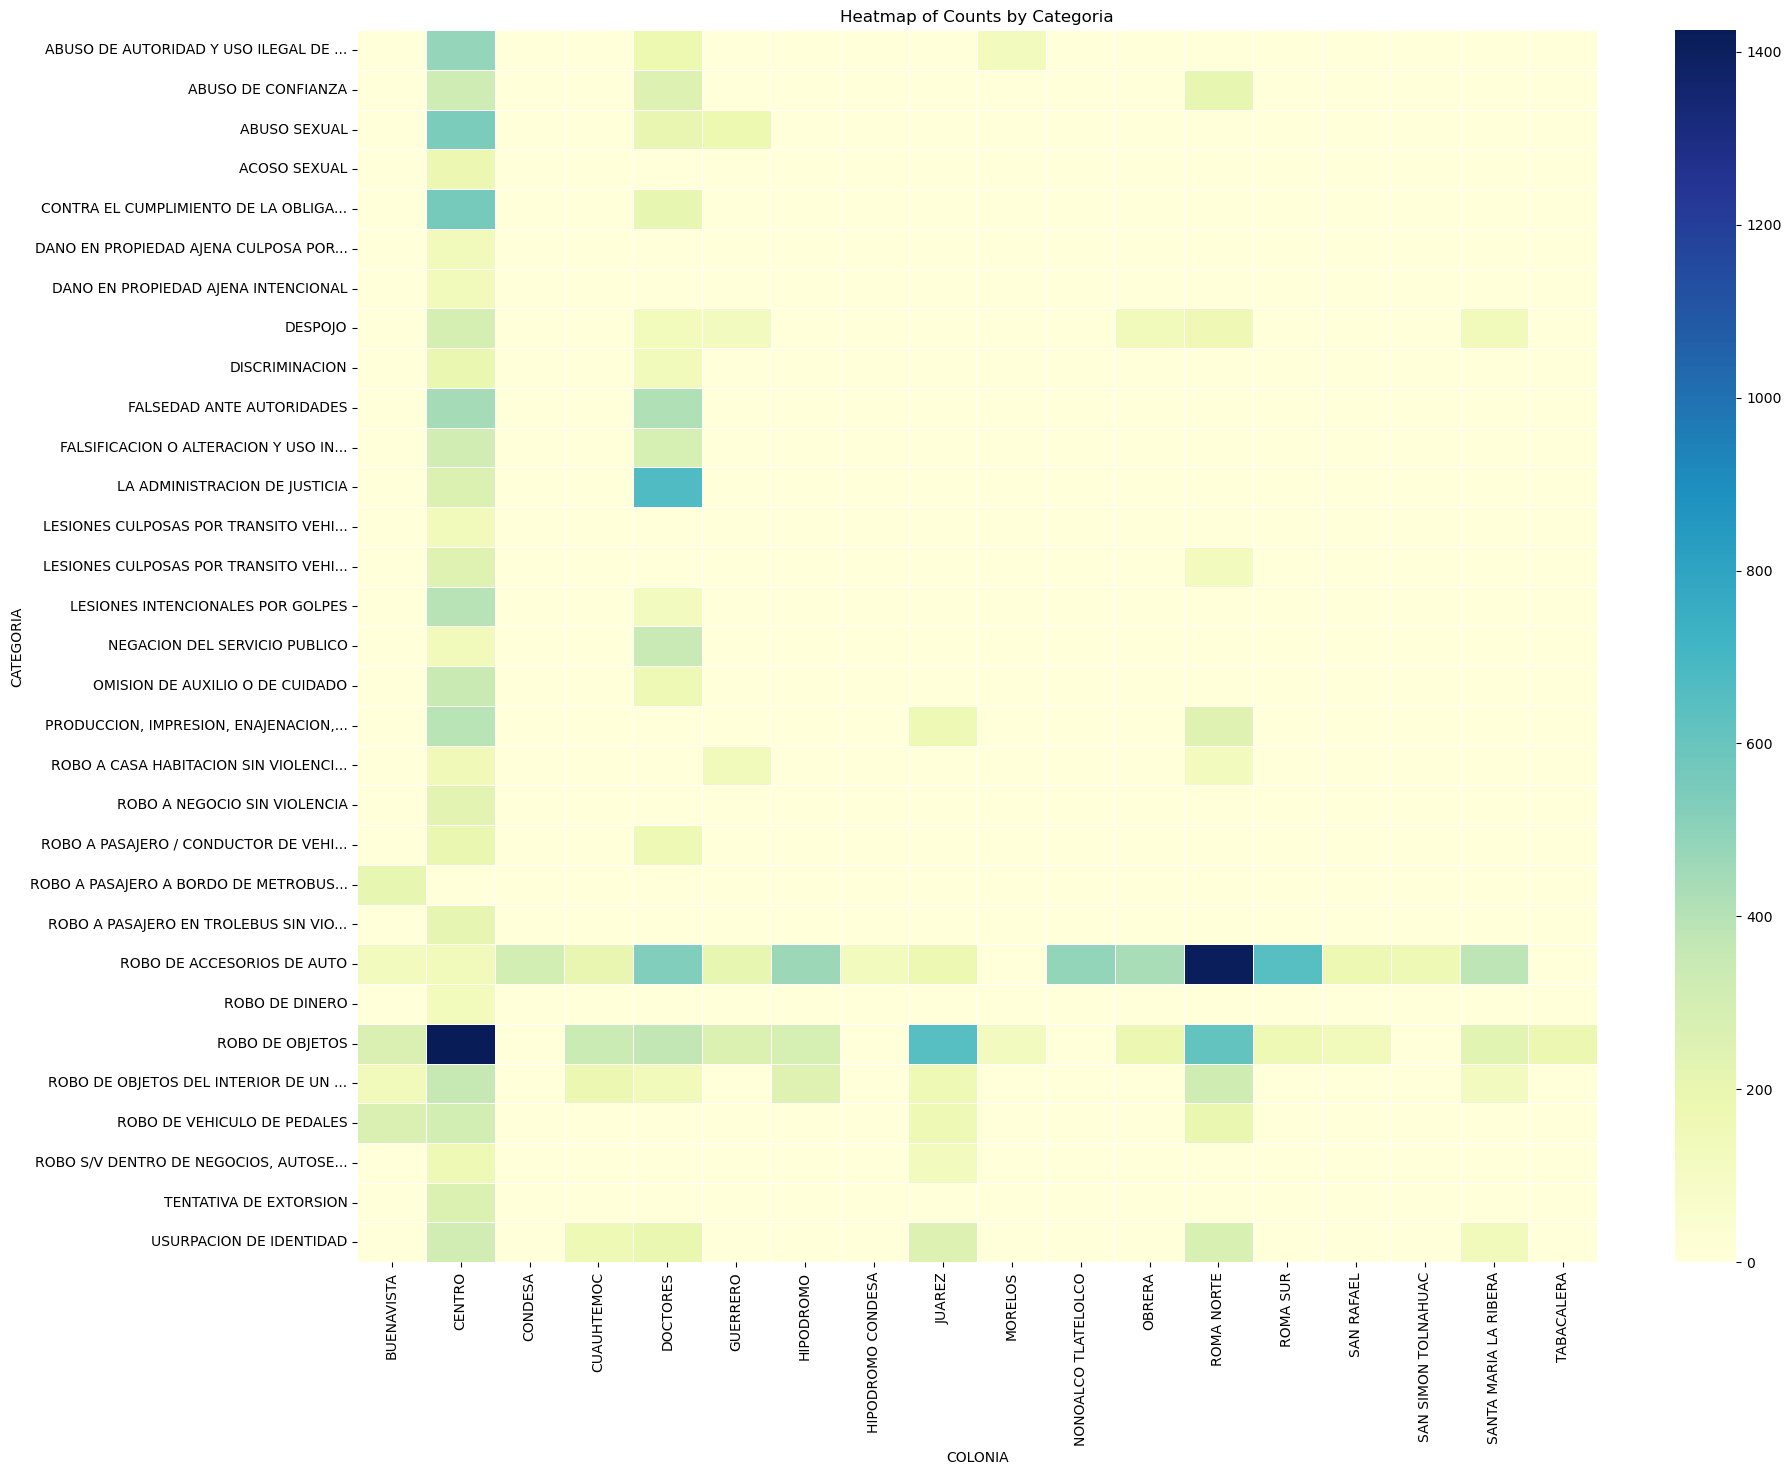

In [14]:

values_to_drop = ['FRAUDE', 'AMENAZAS', 'VIOLENCIA FAMILIAR']
rows_to_drop = cuau_bajo['delito'].isin(values_to_drop)

heatmap_data = cuau_bajo[~rows_to_drop].head(100).pivot_table(index='delito',
                                                    columns='colonia',
                                                    values='count',
                                                    fill_value=0,
                                                    aggfunc='sum')

heatmap(heatmap_data, 'Heatmap of Counts by Categoria','COLONIA','CATEGORIA')


This heatmap shows:
- There is a lot of crimes reported in *Colonia Centro*, specially in crime *Robo de Objetos*
- After Colonia *Centro*, colonia *Doctores* also has a higher amount of reported crimes than other colonias
- Roma Norte colonia has a lot of autoparts stolen crimes (Robo de Accesorios de Autos) 

A similar analysis will be made, but considering only columns related to thefts and violent crimes on the streets that would make a visitor hesitate to visit a particular zone

In [15]:
#cuau_robos = cuau_delitos[]
additional_crimes = [  
    "ABUSO SEXUAL",
    "ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA",
    "LESIONES INTENCIONALES POR GOLPES",
    "OMISION DE AUXILIO O DE CUIDADO",
    "ACOSO SEXUAL",
    "ROBO DE PLACA DE AUTOMOVIL",
    "NEGACION DEL SERVICIO PUBLICO",
    "PRIVACION DE LA LIBERTAD PERSONAL",
    "CONTRA LA INTIMIDAD SEXUAL",
    "LESIONES INTENCIONALES POR ARMA BLANCA",
    "SUSTRACCION DE MENORES",
    "LESIONES CULPOSAS" ,
    "LESIONES INTENCIONALES",
    "RETENCION O SUSTRACCION DE MENORES INCAPACES",
    "CORRUPCION DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA",
    "TENTATIVA DE HOMICIDIO",
    "TRATA DE PERSONAS",
    "TORTURA",
    "SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSION)"
]

rows_to_use = cuau_delitos['delito'].str.contains('ROBO') | cuau_delitos['delito'].isin(additional_crimes)
cuau_robos = cuau_delitos[rows_to_use].copy()
cuau_robos.sort_values(by = 'count', ascending = False)

,colonia,categoria,delito,count
693,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1457
619,CENTRO,DELITO DE BAJO IMPACTO,ROBO DE OBJETOS,1425
2576,ROMA NORTE,DELITO DE BAJO IMPACTO,ROBO DE ACCESORIOS DE AUTO,1414
694,CENTRO,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,840
688,CENTRO,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,702
...,...,...,...,...
3540,VALLE GOMEZ,DELITO DE BAJO IMPACTO,ROBO A NEGOCIO SIN VIOLENCIA,1
119,AMPL. ASTURIAS,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE CONDUCTOR DE TAXI PUBLICO Y ...,1
120,AMPL. ASTURIAS,DELITO DE BAJO IMPACTO,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,1
67,ALGARIN,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SI...,1


In [ ]:
additional_crimes = [  
    "ABUSO SEXUAL",
    "ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA",
    "LESIONES INTENCIONALES POR GOLPES",
    "ACOSO SEXUAL",
    "PRIVACION DE LA LIBERTAD PERSONAL",
    "CONTRA LA INTIMIDAD SEXUAL",
    "LESIONES INTENCIONALES POR ARMA BLANCA",
    "SUSTRACCION DE MENORES",
    "LESIONES CULPOSAS" ,
    "LESIONES INTENCIONALES",
    "TENTATIVA DE HOMICIDIO",
    "TRATA DE PERSONAS",
    "TORTURA",
    "SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSION)"
]

rows_to_use = cuau['delito'].str.contains('ROBO') | cuau['delito'].isin(additional_crimes)| cuau['categoria'].str.contains('ROBO')
cuau_robos2 = cuau[rows_to_use] 

In [17]:
cuau_robos2.head()

,idcarpeta,delito,categoria,alcaldia,colonia,sexo_fem,edad,tipopersona,calidadjuridica,anio_denuncia,...,colonia_alt,crimen_lat,crimen_lon,hecho_time,denuncia_time,cve_col,clasif,alc,cve_alc,polygon
0,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,CUAUHTEMOC,DOCTORES,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,DOCTORES I,19.42244,-99.15237,2018-12-25 04:00:00,2019-01-04 13:16:00,015-010,COLONIA,CUAUHTEMOC,15,"[[-99.15519890116673, 19.40656058216308], [-99..."
1,8324482,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,MORELOS,0,39,FISICA,OFENDIDO,2019,...,MORELOS II,19.44962,-99.12782,2018-12-23 10:00:00,2019-01-04 13:19:00,015-019,COLONIA,CUAUHTEMOC,15,"[[-99.13938480039275, 19.44401178894581], [-99..."
2,8324485,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CUAUHTEMOC,ROMA NORTE,0,37,FISICA,OFENDIDO,2019,...,ROMA NORTE III,19.41359,-99.15729,2018-12-31 11:00:00,2019-01-04 13:23:00,015-024,COLONIA,CUAUHTEMOC,15,"[[-99.17671177030077, 19.420286327194944], [-9..."
3,8324496,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CUAUHTEMOC,JUAREZ,0,36,FISICA,VICTIMA Y DENUNCIANTE,2019,...,JUAREZ,19.42676,-99.16640,2019-01-03 15:00:00,2019-01-04 13:35:00,015-017,COLONIA,CUAUHTEMOC,15,"[[-99.17571912544206, 19.422519931378844], [-9..."
4,8324527,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,0,39,FISICA,VICTIMA Y DENUNCIANTE,2019,...,GUERRERO III,19.43769,-99.14753,2018-12-22 18:34:00,2019-01-04 13:59:00,015-014,COLONIA,CUAUHTEMOC,15,"[[-99.14910747563131, 19.437890366845085], [-9..."
